In [1]:
# 1) Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2) import dataframe
df=pd.read_csv("C:/Users/Selva.M/Downloads/data_science/project_4/parkinsons - parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.drop('name',axis=1,inplace=True)

In [7]:
df['status'].value_counts() 

status
1    147
0     48
Name: count, dtype: int64

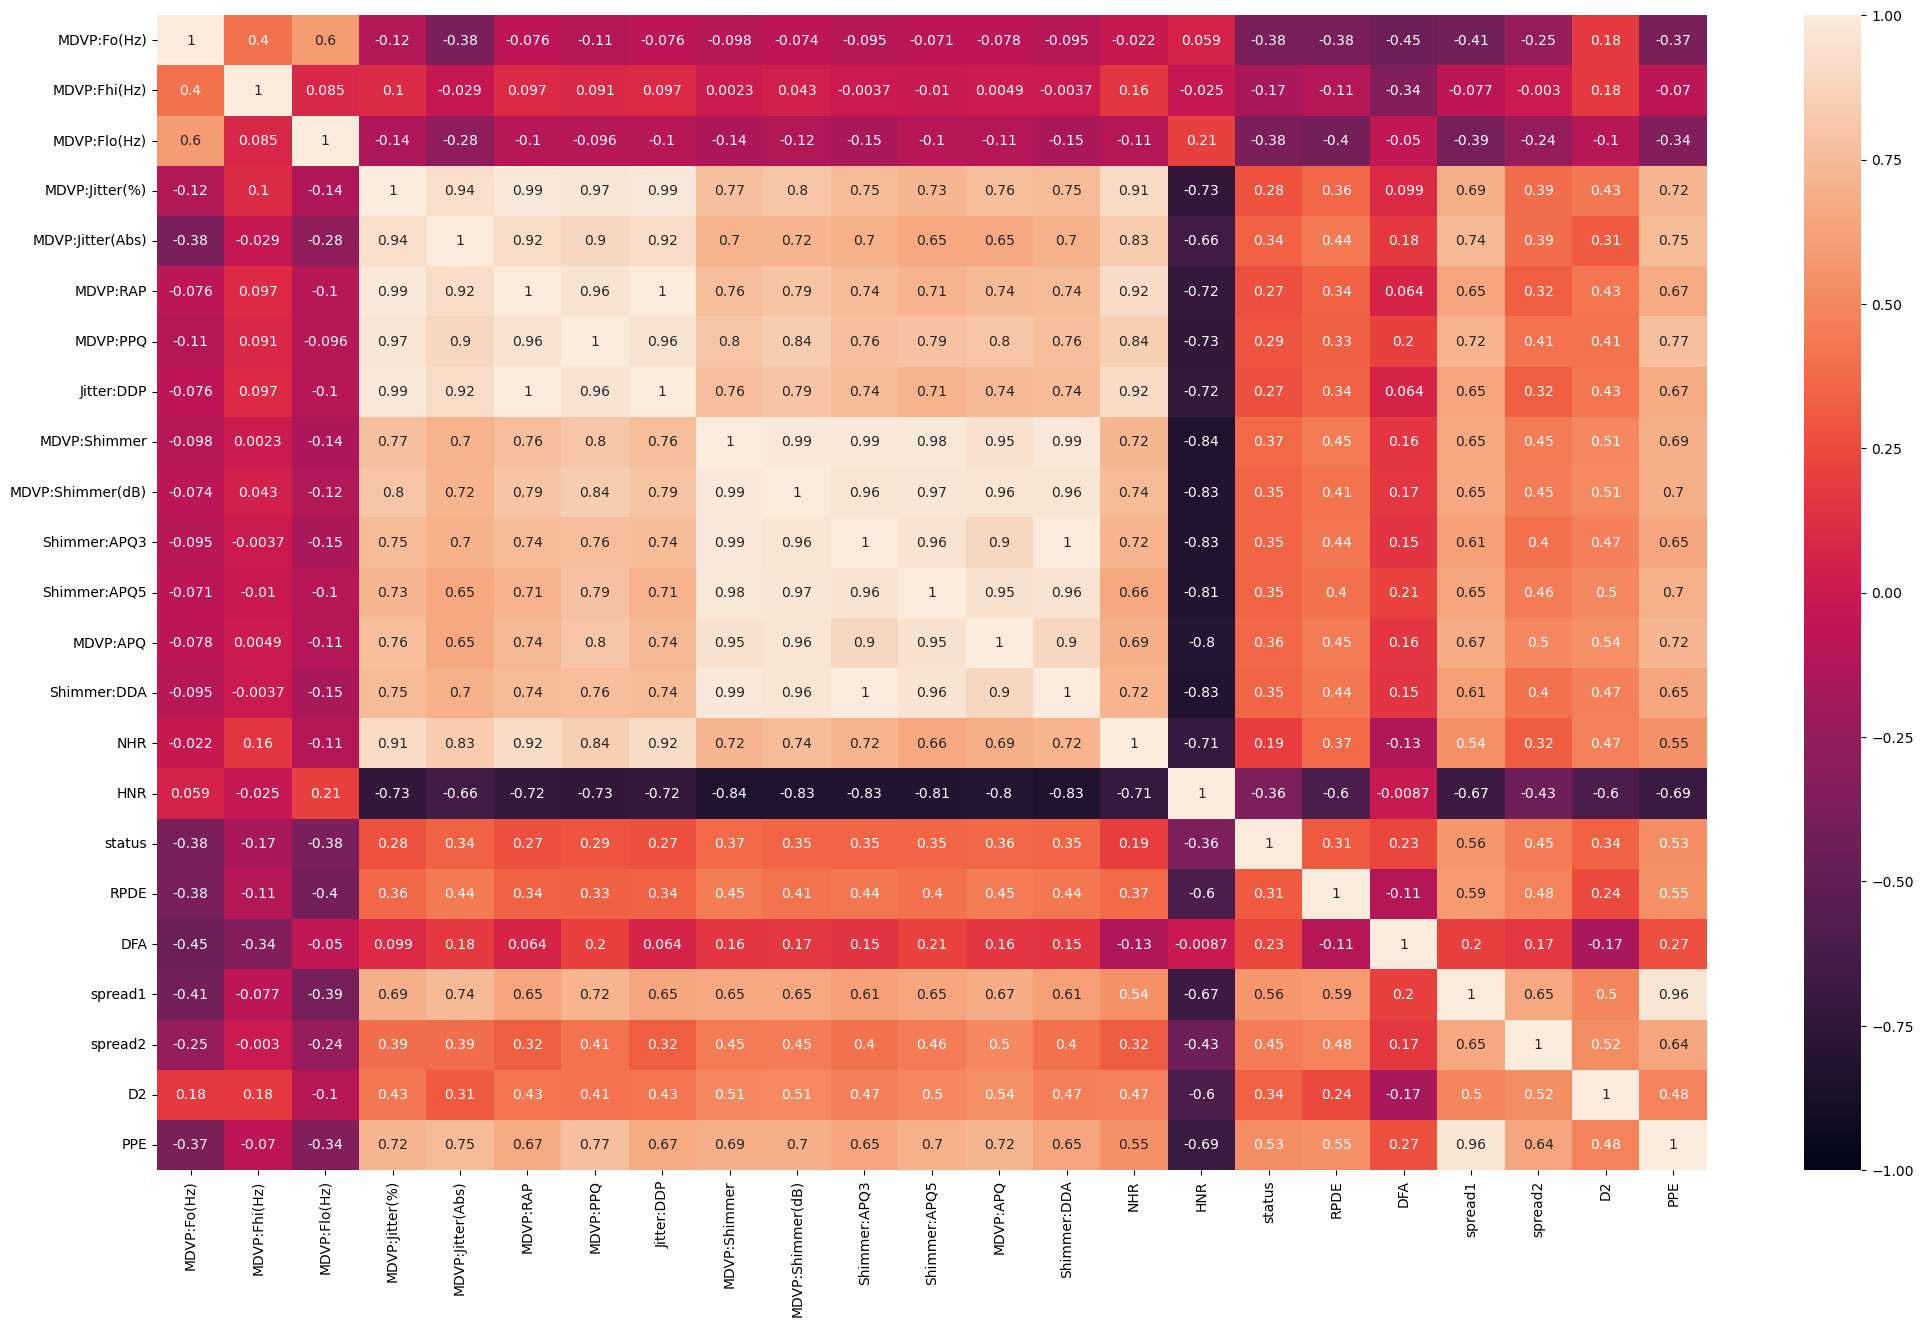

In [8]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [9]:
df.corr(numeric_only=True)['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [10]:
# 3) Select Features And Target
x = df.drop(columns=['status'])
y = df['status']

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (195, 22)
Shape of y: (195,)


In [11]:
# 4) Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (156, 22)
Shape of y_train: (156,)
Shape of X_test: (39, 22)
Shape of y_test: (39,)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [13]:
models = {
    'Logistic Regression':(LogisticRegression(),{}),
    'KNN':(KNeighborsClassifier(),{'model__n_neighbors':[1,3,6,10],'model__weights':['uniform','distance']}),
    'Decision Tree':(DecisionTreeClassifier(),{'model__max_depth':[1,4,8,10],'model__criterion':['gini','entropy']}),
    'Random Forest':(RandomForestClassifier(),{'model__n_estimators':[30,90,100,130],'model__criterion':['gini','entropy']})
}

In [14]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [15]:
# 5) Model Train 
results = {}

for name,(model,params) in models.items():
  pipe = ImbPipeline([
                      ('scaler',StandardScaler()),
                      ('smote',SMOTE()),
                      ('model',model)
  ])

  grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
  grid.fit(x_train,y_train)

  best_model = grid.best_estimator_ 
  y_hat = best_model.predict(x_test)

  y_hat = grid.predict(x_test)
  acc = accuracy_score(y_test,y_hat)
  f1 = f1_score(y_test,y_hat)
  recall = recall_score(y_test,y_hat)
  precision = precision_score(y_test,y_hat)

  results[name] = {
      'model':name,
      'best_params':grid.best_params_,
      'score':grid.best_score_,
      'accuracy':acc,
      'f1_score':f1,
      'recall':recall,
      'precision':precision,
  }
 

In [16]:
result_df = pd.DataFrame(results).T
result_df

,model,best_params,score,accuracy,f1_score,recall,precision
Logistic Regression,Logistic Regression,{},0.80746,0.769231,0.823529,0.724138,0.954545
KNN,KNN,"{'model__n_neighbors': 1, 'model__weights': 'd...",0.929435,0.974359,0.983051,1.0,0.966667
Decision Tree,Decision Tree,"{'model__criterion': 'entropy', 'model__max_de...",0.820766,0.794872,0.866667,0.896552,0.83871
Random Forest,Random Forest,"{'model__criterion': 'entropy', 'model__n_esti...",0.909879,0.948718,0.965517,0.965517,0.965517


In [17]:
# 6) Best Model
print(best_model)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=30))])


In [18]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



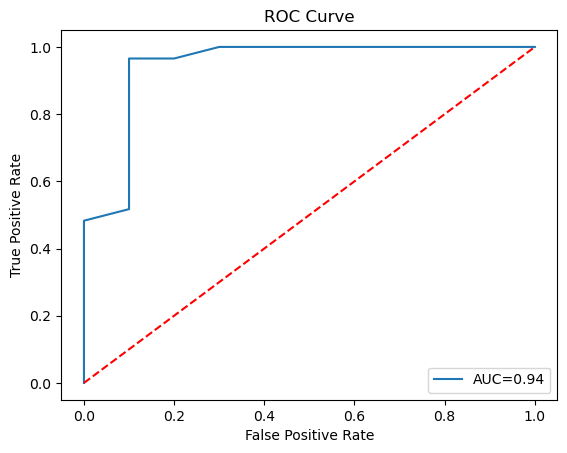

In [19]:
y_prob =best_model.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_prob[:,1])
auc_score = roc_auc_score(y_test,y_prob[:,1])
plt.plot(fpr,tpr,label=f'AUC={auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)
cm

array([[ 9,  1],
       [ 1, 28]])

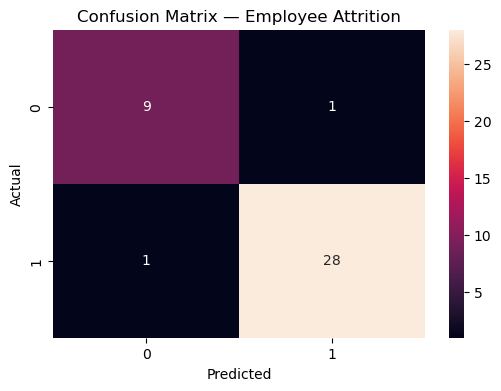

In [21]:
plt.rcParams['figure.figsize'] = [6,4]
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Employee Attrition")
plt.show()

In [22]:
#7) Save Cleaned Data
df.to_csv("cleaned_parkinsons_dataset.csv", index=False)

In [23]:
cdf = pd.read_csv("C:/Users/Selva.M/Downloads/data_science/project_4/cleaned_parkinsons_dataset.csv")
pd.set_option("display.max_column", None)
cdf.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [24]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [25]:
package = {
    "model": best_model,
    "feature_names": x.columns.tolist()
}

In [26]:
print(package)

{'model': Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=30))]), 'feature_names': ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']}


In [27]:
# 8) Saving Best Model
import pickle

with open('best_parkinsons_model.pkl','wb') as f:
    pickle.dump(package,f)